#**Lab | Cleaning categorical data**

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

Instructions
1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
3. What should we do with the customer_id column?
4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [30]:
#Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
#Load the csv. Use the variable customer_df as customer_df = pd.read_csv()
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [139]:
#What should we do with the customer_id column?
#Load the continuous and discrete variables into numericals_df and categorical_df variables, 
#for eg.: numerical_df = customer_df.select_dtypes() categorical_df = customer_df.select_dtypes()
customer_df.columns=[c.lower().replace(' ', '_') for c in customer_df.columns]
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [89]:
data_cat= customer_df.select_dtypes(include=["object", "datetime64"])
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [102]:
data_num= customer_df.select_dtypes(include=["float64","int64"])
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Plot every categorical variable. 
What can you see in the plots? 
Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. 

This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

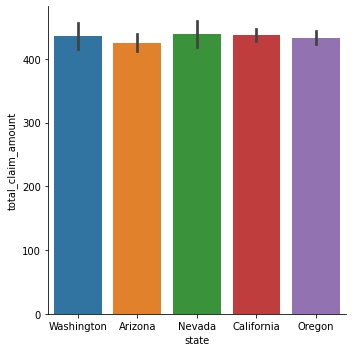

In [ ]:
sns.catplot(data=customer_df, x="state", y="total_claim_amount",  kind="bar")

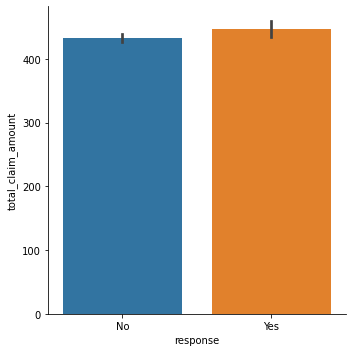

In [ ]:
sns.catplot(data=customer_df, x="response", y="total_claim_amount",  kind="bar")

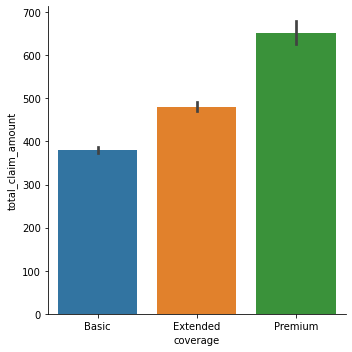

In [ ]:
sns.catplot(data=customer_df, x="coverage", y="total_claim_amount",  kind="bar")

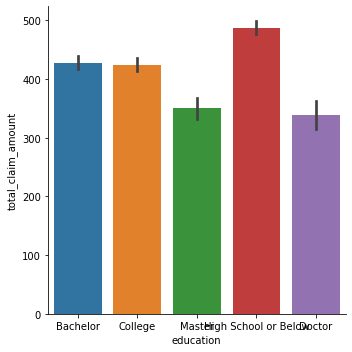

In [ ]:
sns.catplot(data=customer_df, x="education", y="total_claim_amount",  kind="bar")

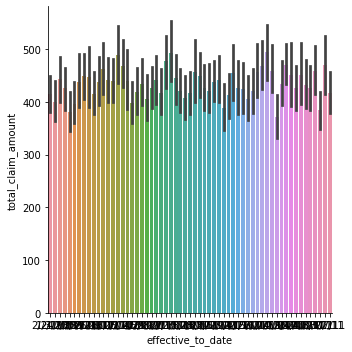

In [ ]:
sns.catplot(data=customer_df, x="effective_to_date", y="total_claim_amount",  kind="bar")

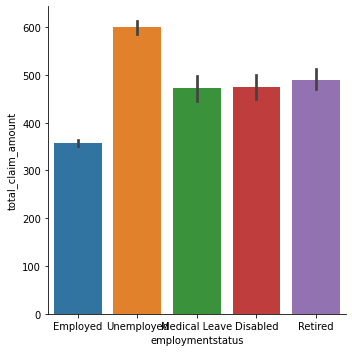

In [ ]:
sns.catplot(data=customer_df, x="employmentstatus", y="total_claim_amount",  kind="bar")

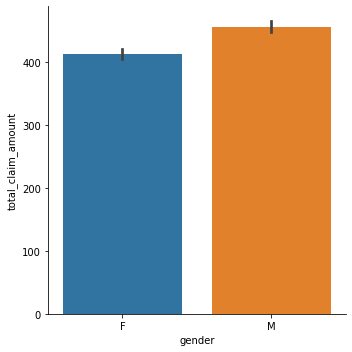

In [ ]:
sns.catplot(data=customer_df, x="gender", y="total_claim_amount",  kind="bar")

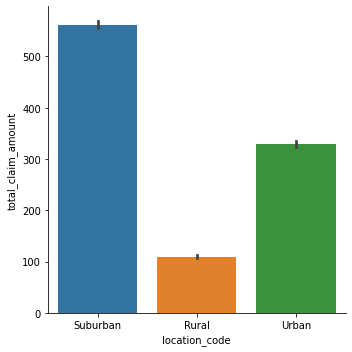

In [ ]:
sns.catplot(data=customer_df, x="location_code", y="total_claim_amount",  kind="bar")

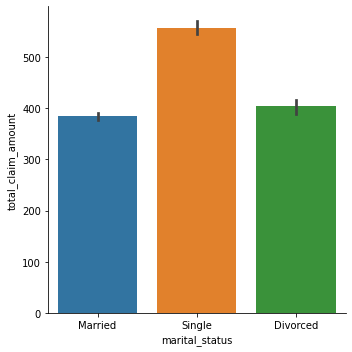

In [ ]:
sns.catplot(data=customer_df, x="marital_status", y="total_claim_amount",  kind="bar")

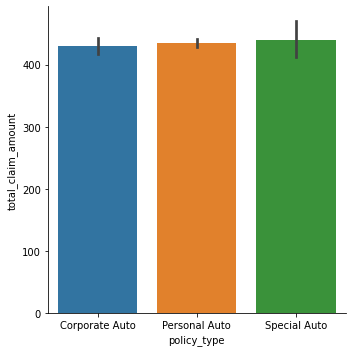

In [ ]:
sns.catplot(data=customer_df, x="policy_type", y="total_claim_amount",  kind="bar")

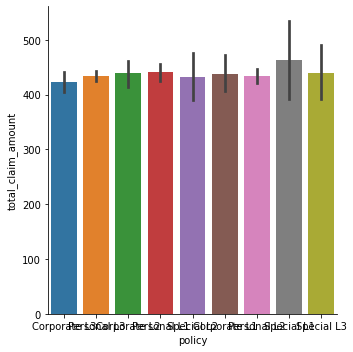

In [ ]:
sns.catplot(data=customer_df, x="policy", y="total_claim_amount",  kind="bar")

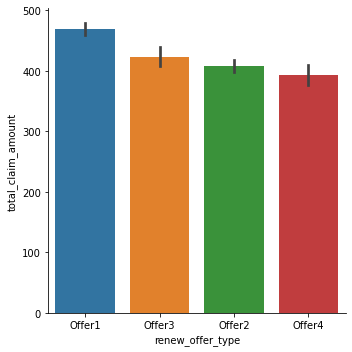

In [ ]:
sns.catplot(data=customer_df, x="renew_offer_type", y="total_claim_amount",  kind="bar")

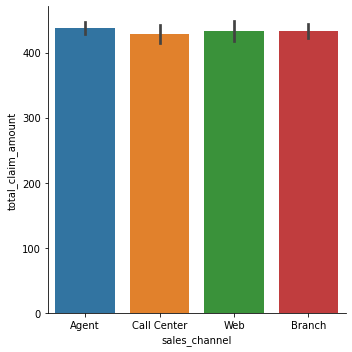

In [ ]:
sns.catplot(data=customer_df, x="sales_channel", y="total_claim_amount",  kind="bar")

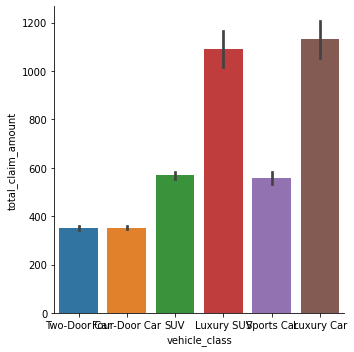

In [ ]:
sns.catplot(data=customer_df, x="vehicle_class", y="total_claim_amount",  kind="bar")

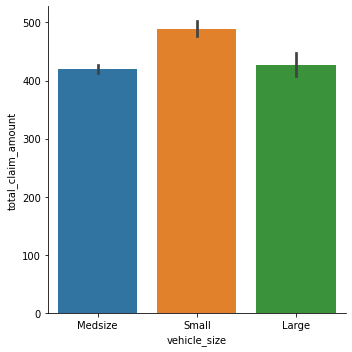

In [ ]:
sns.catplot(data=customer_df, x="vehicle_size", y="total_claim_amount",  kind="bar")

6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
for c in data_cat:
  value_counts=data_cat[c].value_counts()
  print('Columna:', c, value_counts)  

Columna: customer BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
Columna: state California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Columna: response No     7826
Yes    1308
Name: response, dtype: int64
Columna: coverage Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Columna: education Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Columna: effective_to_date 1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161


In [88]:
#Empezamos con employmentstatus, reordenando las categorias
data_cat['employmentstatus'].value_counts()
vals=pd.DataFrame(data_cat['employmentstatus'].value_counts())
vals=vals.reset_index()
vals.columns=['employmentstatus','counts']
vals
     

,employmentstatus,counts
0,Employed,5698
1,Unemployed,2317
2,Other,1119


In [38]:
emp_status =vals[vals['counts']>2000]
emp_status =list(emp_status['employmentstatus'])
emp_status

['Employed', 'Unemployed']

In [39]:
def clean_empstatus(x):
  if x in emp_status:
    return x
  else:
    return 'Other'

In [40]:
data_cat['employmentstatus']=list(map(clean_empstatus,data_cat['employmentstatus']))
data_cat['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [41]:
#Elegimos también education
vals2 = pd.DataFrame(data_cat['education'].value_counts())
vals2 = vals2.reset_index()
vals2 .columns = ['education','counts']
vals2 

,education,counts
0,Bachelor,2748
1,College,2681
2,High School or Below,2622
3,Master,741
4,Doctor,342


In [42]:
#me quedare solo con las  categorias  arriba de 2000 
emp_edu =vals2 [vals2 ['counts']>2000]
emp_edu =list(emp_edu['education'])
emp_edu

['Bachelor', 'College', 'High School or Below']

In [43]:
def clean_edu(x):
  if x in emp_edu:
    return x
  else:
    return 'Higher'

In [44]:
data_cat['education']=list(map(clean_edu, data_cat['education']))
data_cat['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Higher                  1083
Name: education, dtype: int64

In [45]:
#También elegimos  policy ya que tiene pocos valores
v3 = pd.DataFrame(data_cat['policy'].value_counts())
v3 = v3.reset_index()
v3.columns=['policy','counts']
v3
     

,policy,counts
0,Personal L3,3426
1,Personal L2,2122
2,Personal L1,1240
3,Corporate L3,1014
4,Corporate L2,595
5,Corporate L1,359
6,Special L2,164
7,Special L3,148
8,Special L1,66


In [46]:
#Me quedare sólo con los policy arriba de 1000 customers 
emp_pol =v3[v3['counts']>1000]
emp_pol =list(emp_pol['policy'])
emp_pol

['Personal L3', 'Personal L2', 'Personal L1', 'Corporate L3']

In [47]:
def clean_pol(x):
  if x in emp_pol:
    return x
  else:
    return 'Other'

In [48]:
data_cat['policy']=list(map(clean_pol,data_cat['policy']))
data_cat['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Other           1332
Personal L1     1240
Corporate L3    1014
Name: policy, dtype: int64

In [49]:
#ahora para vehicle class
v4 = pd.DataFrame(data_cat['vehicle_class'].value_counts())
v4 = v4.reset_index()
v4.columns = ['vehicle_class','counts']
v4

,vehicle_class,counts
0,Four-Door Car,4621
1,Two-Door Car,1886
2,SUV,1796
3,Sports Car,484
4,Luxury SUV,184
5,Luxury Car,163


In [50]:
#Me quedare sólo con los valores arriba de 1000 customers 
emp_veh = v4[v4['counts']>1000]
emp_veh = list(emp_veh['vehicle_class'])
emp_veh
     

['Four-Door Car', 'Two-Door Car', 'SUV']

In [51]:
def clean_veh(x):
  if x in emp_veh:
    return x
  else:
    return 'Other'
     

In [52]:
data_cat['vehicle_class']=list(map(clean_veh,data_cat['vehicle_class']))
data_cat['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Other             831
Name: vehicle_class, dtype: int64

In [53]:
#Verificamos que los cambios de las categorias se hayan realizado 
for c in data_cat:
  value_counts=data_cat[c].value_counts()
  print('Columna:', c, value_counts)  

Columna: customer BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
Columna: state California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Columna: response No     7826
Yes    1308
Name: response, dtype: int64
Columna: coverage Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Columna: education Bachelor                2748
College                 2681
High School or Below    2622
Higher                  1083
Name: education, dtype: int64
Columna: effective_to_date 1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160

Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

1. Open the categoricals variable we created before. categoricals = data.select_dtypes(np.object) categoricals.head()
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [54]:
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Other,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Other,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


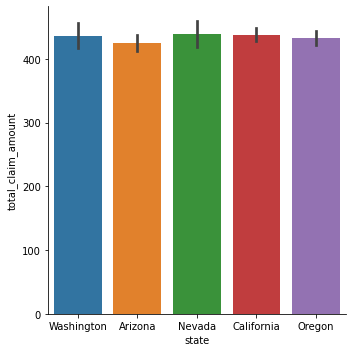

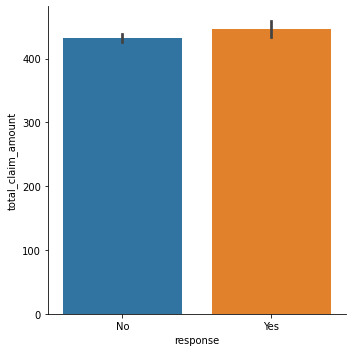

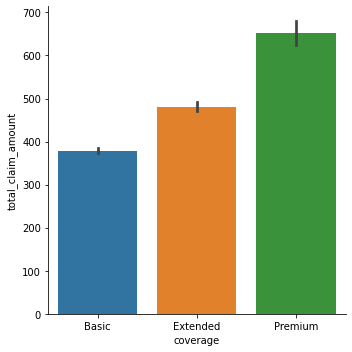

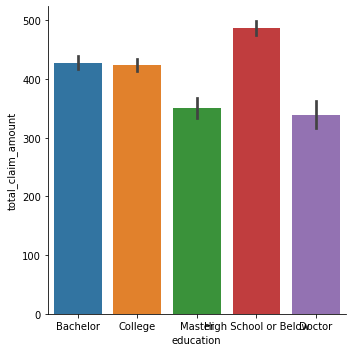

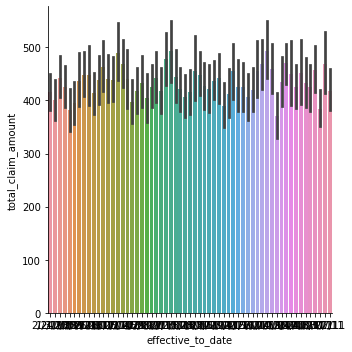

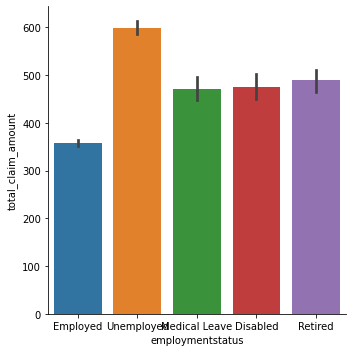

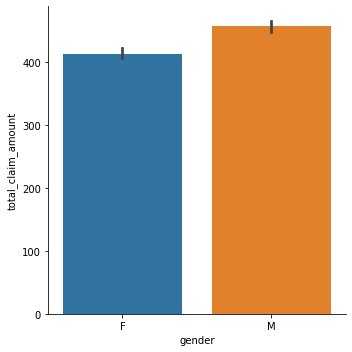

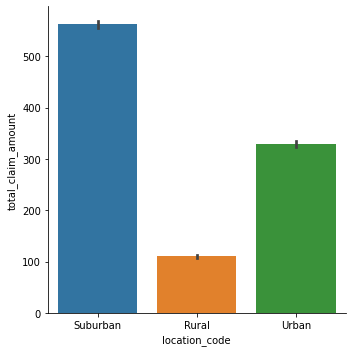

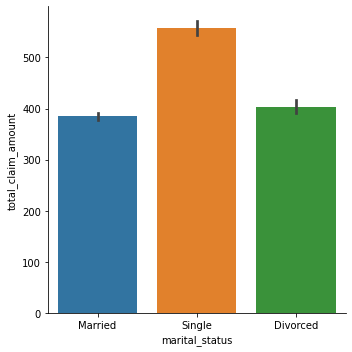

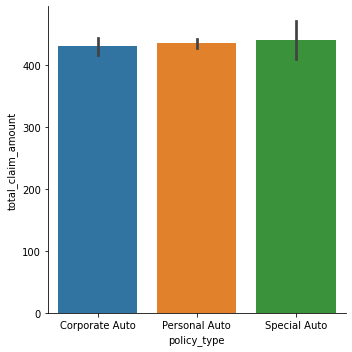

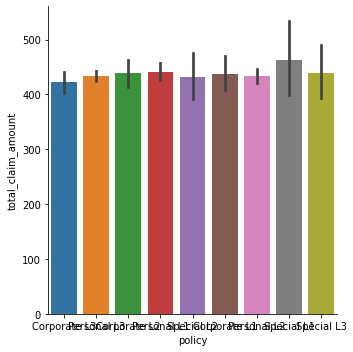

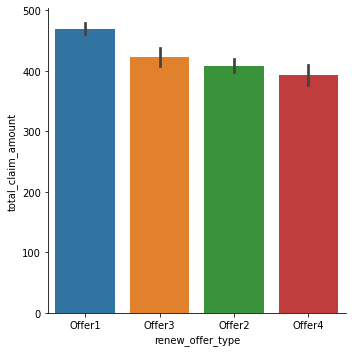

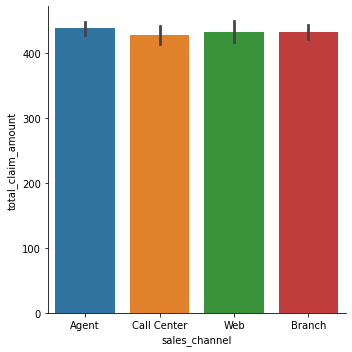

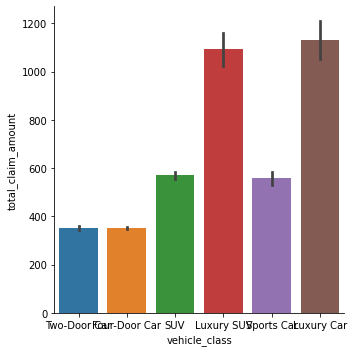

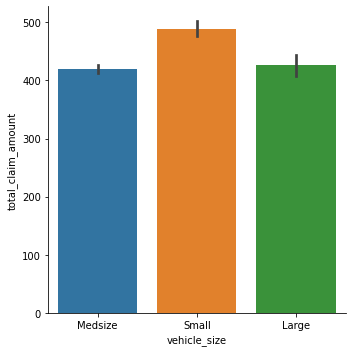

In [55]:
sns.catplot(data=customer_df, x="state", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="response", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="coverage", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="education", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="effective_to_date", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="employmentstatus", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="gender", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="location_code", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="marital_status", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="policy_type", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="policy", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="renew_offer_type", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="sales_channel", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="vehicle_class", y="total_claim_amount",  kind="bar")
plt.show()
sns.catplot(data=customer_df, x="vehicle_size", y="total_claim_amount",  kind="bar")
plt.show()

In [ ]:
#There might be some columns that seem to be redundant, check their values to be sure. 
#What should we do with them?

#Las gráficas de la columnas como response, policy_type, policy y sales channel contienen información repetitiva
# en cada una de las barras del gráfico, por lo que no se observa un patrón diferente y se optaría por
# no considerarlas en el estudio 

In [56]:
data=customer_df

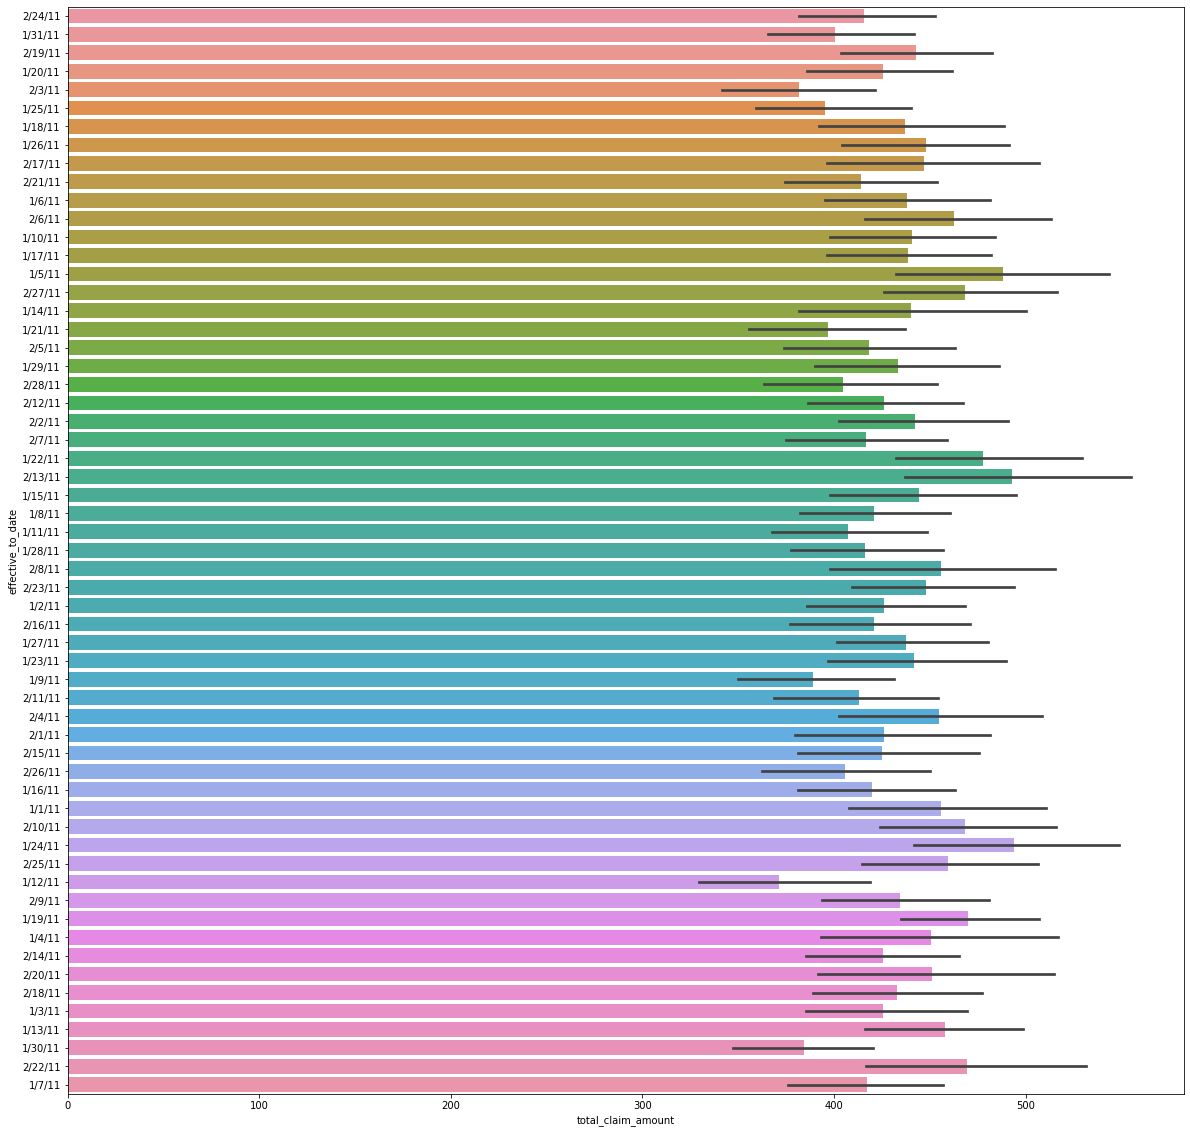

In [57]:
plt.figure(figsize=(20,20))
sns.barplot(data=customer_df, x=data['total_claim_amount'], y='effective_to_date')

Se puede extraer la información sobre los días en los que hubo más o menos movimientos 

Lab | Data cleaning and wrangling 4.04

Instructions


So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [ ]:
"""
We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
Use the one you feel more comfortable with, define a function for that. Use the function to remove
 the outliers and apply it to the dataframe.
 
""" 

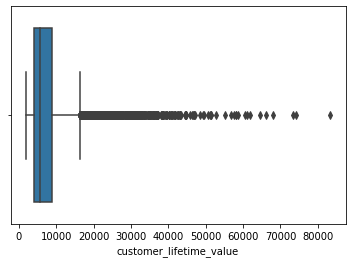

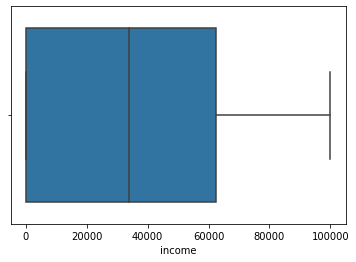

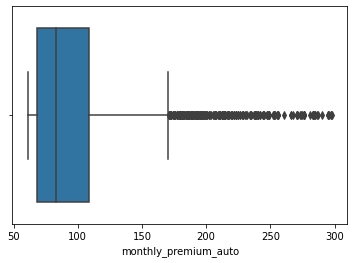

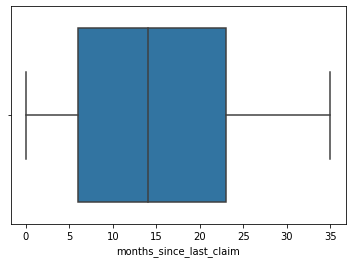

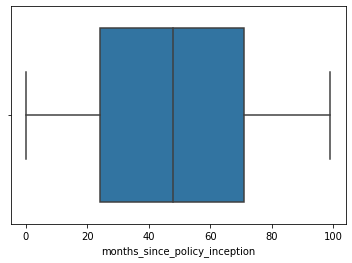

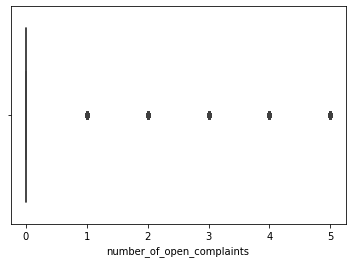

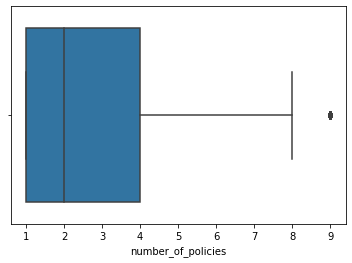

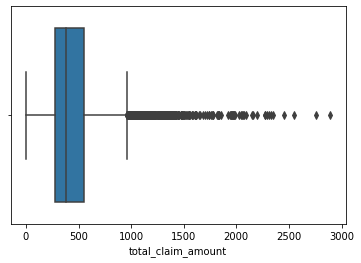

In [71]:
for c in data_num:
  sns.boxplot( x=data_num[c])
  plt.show()

In [91]:
#Vamos a manipular los datos para que haya un cierto % de outliers y no queden
#posibles modelos "sobreentrenados" (es cuando le damos demasiados datos idealizados)

#una regla de dedo utilizada para saber cuántos outliers dejar, es deja 1.5 veces el 
#rando intercuartli (es el Q75%-Q25%)

#Lo primero es calcular el IQR
#customer_lifetime_value
#monthly_premium_auto

#Decidimos solo quitar outliers de esas columnas porque las otras no presentan outliers y 
# total_claim_amount es nuestro target

iqr=np.percentile(data_num['customer_lifetime_value'],75)-np.percentile(data_num['customer_lifetime_value'],25)
upper_limit=np.percentile(data_num['customer_lifetime_value'],75)+1.5*iqr
print(upper_limit)


16414.039911750002


In [92]:
#"Viendo qué son outliers"
prueba=data_num[data_num['customer_lifetime_value']>upper_limit]
len(prueba)

817

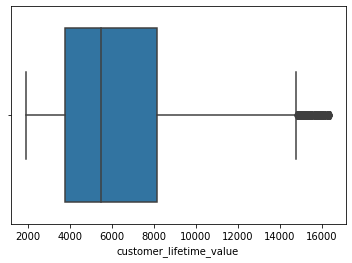

In [93]:
#Confirmamos que se quitaron outliers
data_num=data_num[data_num['customer_lifetime_value']<upper_limit]
sns.boxplot(x=data_num['customer_lifetime_value'])
plt.show()

In [94]:
iqr=np.percentile(data_num['monthly_premium_auto'],75)-np.percentile(data_num['monthly_premium_auto'],25)
upper_limit=np.percentile(data_num['monthly_premium_auto'],75)+1.5*iqr
print(upper_limit)

165.5


In [95]:
#"Viendo qué son outliers"
prueba=data_num[data_num['monthly_premium_auto']>upper_limit]
len(prueba)

301

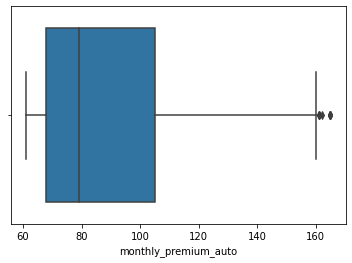

In [96]:
#Confirmamos que se quitaron outliers
data_num=data_num[data_num['monthly_premium_auto']<upper_limit]
sns.boxplot(x=data_num['monthly_premium_auto'])
plt.show()

In [103]:
#Tratamos con number_of_open_complaints, reordenando las categorias
data_num['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [104]:
data_num['number_of_open_complaints'].value_counts()
vals=pd.DataFrame(data_num['number_of_open_complaints'].value_counts())
vals=vals.reset_index()
vals.columns=['number_of_open_complaints','counts']
vals

,number_of_open_complaints,counts
0,0,7252
1,1,1011
2,2,374
3,3,292
4,4,149
5,5,56


In [105]:
#Me quedare con los valores arriba de 7000 customers 
number_comp = vals[vals['counts']>7000]
number_comp = list(number_comp['number_of_open_complaints'])
number_comp

[0]

In [106]:
def clean_veh(x):
  if x in number_comp:
    return x
  else:
    return '1'

In [107]:
data_num['number_of_open_complaints']=list(map(clean_veh,data_num['number_of_open_complaints']))
data_num['number_of_open_complaints'].value_counts()

0    7252
1    1882
Name: number_of_open_complaints, dtype: int64

Create a copy of the dataframe for the data wrangling.



In [108]:
customer_df_copy=customer_df.copy
customer_df_copy

<bound method NDFrame.copy of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor      

Normalize the continuous variables. You can use any one method you want.

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
data_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [111]:
X_num=data_num[['customer_lifetime_value', 'income']]

In [112]:
transfromer=StandardScaler().fit(X_num)
x_stan=transfromer.transform(X_num)


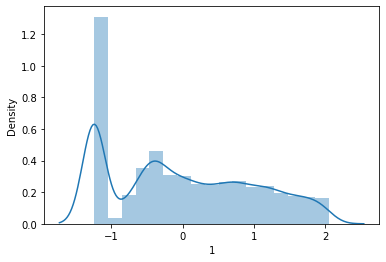

In [113]:
x_stan_df=pd.DataFrame(x_stan)

sns.distplot(x_stan_df[1])

Encode the categorical variables

In [114]:
x_cat=data_cat

In [115]:
#ahora vamos a tratar la data categórica, i.e. pasarlo a numérico
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(x_cat)
encoder=encoder.transform(x_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [116]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [117]:
data_cat['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [ ]:
"""
import re

def month(x):
  x=str(x)
  if len(x)<4:
    return np.nan
  else: 
    pattern='\d'
    mt=re.findall(pattern,x)[0]
    return int(mt)

months = list(map(month,data_cat['effective_to_date']))
months[:10]
"""

In [118]:
data_cat['day week'] = pd.to_datetime(data_cat['effective_to_date']).dt.day

In [119]:
data_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day week
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,24
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,31
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,19
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,20
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3


In [120]:
data_cat['month'] = pd.to_datetime(data_cat['effective_to_date']).dt.month

In [121]:
data_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day week,month
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,24,2
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,31,1
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,19,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,20,1
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,2


Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [ ]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

In [125]:
data_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day week,month
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,24,2
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,31,1
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,19,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,20,1
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,2


In [140]:
customer_df["coverage"] = customer_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [141]:
customer_df["employmentstatus"] = customer_df["employmentstatus"].map({"Unemployed" : 0, "Employed" : 1})

In [142]:
customer_df["location_code"] = customer_df["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban":2})

In [143]:
customer_df["vehicle_size"] =customer_df["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large":2})

In [145]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,0,Bachelor,2/24/11,1.0,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,0
1,QZ44356,Arizona,6979.535903,No,1,Bachelor,1/31/11,0.0,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,0
2,AI49188,Nevada,12887.431650,No,2,Bachelor,2/19/11,1.0,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,0
3,WW63253,California,7645.861827,No,0,Bachelor,1/20/11,0.0,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,0
4,HB64268,Washington,2813.692575,No,0,Bachelor,2/3/11,1.0,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,0


In [146]:
data_cat_onehot= customer_df.select_dtypes(include=["object", "datetime64"])
data_cat_onehot

,customer,state,response,education,effective_to_date,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,BU79786,Washington,No,Bachelor,2/24/11,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,QZ44356,Arizona,No,Bachelor,1/31/11,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,AI49188,Nevada,No,Bachelor,2/19/11,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,WW63253,California,No,Bachelor,1/20/11,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,HB64268,Washington,No,Bachelor,2/3/11,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Bachelor,2/10/11,M,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car
9130,PK87824,California,Yes,College,2/12/11,F,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car
9131,TD14365,California,No,Bachelor,2/6/11,M,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car
9132,UP19263,California,No,College,2/3/11,M,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car


In [151]:
data_num1= customer_df.select_dtypes(include=["float64", "int64"])
data_num1

,customer_lifetime_value,coverage,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size
0,2763.519279,0,1.0,56274,1,69,32,5,0,1,384.811147,0
1,6979.535903,1,0.0,0,1,94,13,42,0,8,1131.464935,0
2,12887.431650,2,1.0,48767,1,108,18,38,0,2,566.472247,0
3,7645.861827,0,0.0,0,1,106,18,65,0,7,529.881344,0
4,2813.692575,0,1.0,43836,0,73,12,44,0,1,138.130879,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,0,1.0,71941,2,73,18,89,0,2,198.234764,0
9130,3096.511217,1,1.0,21604,1,79,14,28,0,1,379.200000,0
9131,8163.890428,1,0.0,0,1,85,9,37,3,2,790.784983,0
9132,7524.442436,1,1.0,21941,1,96,34,3,0,3,691.200000,2


In [152]:
x_cat=data_cat_onehot

In [153]:
#Aplicamos OneHot a las variables que faltan de la data categorica
encoder=OneHotEncoder(drop='first').fit(x_cat)
encoder=encoder.transform(x_cat).toarray()
encoder

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [154]:
X=np.concatenate((encoder, x_stan), axis=1)
X

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.76287773,  0.61282744],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.14924546, -1.23961684],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.71063622,  0.36570978],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.02313483, -1.23961684],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.06993547, -0.51735647],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.78495478, -1.23961684]])

Lab | Comparing regression models 4.05

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check LinearRegressor and KNeighborsRegressor.
5. You can check also the MLPRegressor for this task!
6. Check and discuss the results.

In [155]:
#X=np.concatenate((encoder, x_stan), axis=1)
X
y=data_num1['total_claim_amount']

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=100)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [158]:
model_l=LinearRegression()
model_l=model_l.fit(X_train,y_train)

predictions=model_l.predict(X_test)

In [159]:
print('R2', metrics.r2_score(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('sqrt(MSE)', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 0.4549860579638948
MSE 43302.941414511246
MAE 154.6301515086725
sqrt(MSE) 208.09358811484617


In [ ]:
#Intentamos con el modelo de KNeighborsRegressor

In [160]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor(n_neighbors=8,n_jobs=4)
model_knn.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=4, n_neighbors=8)

In [161]:
predictions=model_knn.predict(X_test)

In [162]:
print('R2', metrics.r2_score(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('sqrt(MSE)', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 0.3124077294683678
MSE 54631.20392235684
MAE 166.56089971969075
sqrt(MSE) 233.73318960378057


In [ ]:
#Intentamos con el modelo de MLPRegressor

In [163]:
from sklearn.neural_network import MLPRegressor

In [168]:
model_MLP= MLPRegressor()
model_MLP.fit(X_train, y_train)

MLPRegressor()

In [170]:
expected_y =y_test
predicted_y=model_MLP.predict(X_test)

In [171]:
print('R2', metrics.r2_score(expected_y, predicted_y))
print('MSE', metrics.mean_squared_error(expected_y, predicted_y))
print('MAE', metrics.mean_absolute_error(expected_y, predicted_y))
print('sqrt(MSE)', np.sqrt(metrics.mean_squared_error(expected_y, predicted_y)))

R2 0.42923428471896996
MSE 45348.99462918458
MAE 160.80444752991906
sqrt(MSE) 212.95303385766678
